In [1]:
import cv2
from sklearn.datasets import load_files       
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
import numpy as np
from glob import glob
import matplotlib.pyplot as plt 

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    bur_files = np.array(data['filenames'])
    bur_targets = np_utils.to_categorical(np.array(data['target']), 2)
    return bur_files, bur_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('Bur_check/train/color')
validation_files, validation_targets = load_dataset('Bur_check/validation/color')
test_files, test_targets = load_dataset('Bur_check/test/color')

# load list of bur classes
bur_classes = [item[22:-1] for item in sorted(glob("Bur_check/train/color/*/"))]

# print statistics about the dataset
print('There are %d total Bur classes.' % len(bur_classes))
print bur_classes
print('There are %s total Bur images.\n' % len(np.hstack([train_files, test_files, validation_files])))
print('There are %d training Bur images.' % len(train_files))
print('There are %d validation Bur images.' % len(validation_files))
print('There are %d test Bur images.\n'% len(test_files))
print('There are %d training Bur targets.' % len(train_targets))
print train_targets.sum(axis=0)

Using TensorFlow backend.


There are 2 total Bur classes.
['damaged', 'good']
There are 525 total Bur images.

There are 432 training Bur images.
There are 51 validation Bur images.
There are 42 test Bur images.

There are 432 training Bur targets.
[172. 260.]


(432,)
['Bur_check/train/color/damaged/20180826-095021DamagedBur.png'
 'Bur_check/train/color/good/20180826-175734GoodBur.png'
 'Bur_check/train/color/damaged/20180826-092825DamagedBur.png'
 'Bur_check/train/color/good/20180826-173854GoodBur.png'
 'Bur_check/train/color/damaged/20180826-091356DamagedBur.png']
(432, 2)
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


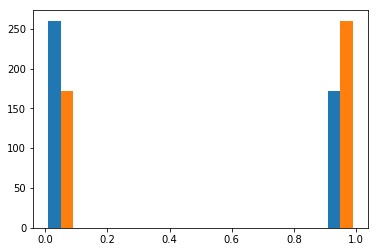

In [2]:
print train_files.shape
print train_files[0:5]
print train_targets.shape
print train_targets[0:5]
plt.hist(train_targets, bins='auto')
plt.show()

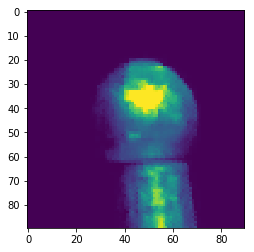

Bur_check/train/color/damaged/20180826-092825DamagedBur.png
(90, 90)


NameError: name 'small_img' is not defined

In [4]:
import cv2
from skimage import data
from skimage.transform import resize                       
%matplotlib inline                               

img = cv2.imread(train_files[2])
#crop_img = img[20:400, 160:420]
# convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# resize to smaller
#small_img = resize(crop_img, (205,115))
#small_img = cv2.resize(gray_img, (0,0), fx=0.5, fy=0.5)
# rescale entries to lie in [0,1]
small_img_m = gray_img.astype('float32')/255

# plot image
plt.imshow(gray_img)
plt.show()
print train_files[2]
print gray_img.shape
print small_img[175,90]
print small_img_m.shape
print small_img[4,90]
new_name = 'Bur_check' + train_files[2][10:]

cv2.imwrite(new_name,small_img,[cv2.IMWRITE_PNG_COMPRESSION, 9])
print new_name


In [31]:
def find_pixel(img, r_query, g_query, b_query):

   # rgb = img.convert('RGB')
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
           r = img[y,x]
           if r > r_query:
                return (y,x)

print(find_pixel(small_img, 1, 1, 1))

(6, 95)


(array([47.,  0.,  0.,  0.,  1.,  0.,  1.,  2.,  0.,  1.,  1.,  1.,  0.,
         3.,  4.,  7., 15., 19., 16., 16., 29., 17.,  2.,  1.,  0.,  1.,
         1.,  1.,  2.,  2.]),
 array([ 0.        ,  0.55307191,  1.10614382,  1.65921574,  2.21228765,
         2.76535956,  3.31843147,  3.87150338,  4.4245753 ,  4.97764721,
         5.53071912,  6.08379103,  6.63686295,  7.18993486,  7.74300677,
         8.29607868,  8.84915059,  9.40222251,  9.95529442, 10.50836633,
        11.06143824, 11.61451015, 12.16758207, 12.72065398, 13.27372589,
        13.8267978 , 14.37986972, 14.93294163, 15.48601354, 16.03908545,
        16.59215736]),
 <a list of 30 Patch objects>)

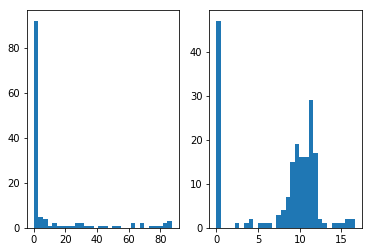

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(np.sum(small_img_m, axis=0), bins=30)
ax2.hist(np.sum(small_img_m, axis=1), bins=30)

In [5]:
from skimage import data
from skimage.transform import resize                       
%matplotlib inline  
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    #print img_path
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path)
    #img = cv2.imread(img_path)
    #crop_img = img[20:400, 160:420]
    # convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # resize to smaller
    # dimensions of our images.
    #img_width, img_height = 205, 115
    #small_img = cv2.resize(gray_img, (0,0), fx=0.5, fy=0.5)
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(gray_img)
    
    # Save images to check    
    #new_name = 'Bur_check' + img_path[10:]
    #cv2.imwrite(new_name,small_img,[cv2.IMWRITE_PNG_COMPRESSION, 9])
    
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [6]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
validation_tensors = paths_to_tensor(validation_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

  0%|          | 0/432 [00:00<?, ?it/s]Exception KeyError: KeyError(<weakref at 0x1c37d67c00; to 'tqdm' at 0x1a33529e10>,) in <bound method tqdm.__del__ of   0%|          | 0/432 [00:00<?, ?it/s]> ignored


TypeError: src is not a numpy array, neither a scalar

In [8]:
print train_tensors.shape
print train_tensors[0].shape
print np.sum(train_tensors[1])
print train_tensors[2,80,80]
Mostra = train_tensors[1].astype('float32')*255
print Mostra[80,80]
#plt.imshow(Mostra)
#plt.show()

(428, 90, 90, 3)
(90, 90, 3)
2568.753
[0. 0. 0.]
[0. 0. 0.]


(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <a list of 30 Patch objects>)

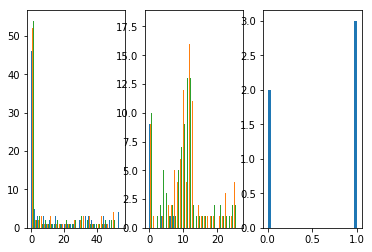

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.hist(np.sum(train_tensors[2], axis=0), bins=30)
ax2.hist(np.sum(train_tensors[2], axis=1), bins=30) 
ax3.hist(train_targets[0:5,0], bins=30) 

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 190.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([-0.5       , -0.46666667, -0.43333333, -0.4       , -0.36666667,
        -0.33333333, -0.3       , -0.26666667, -0.23333333, -0.2       ,
        -0.16666667, -0.13333333, -0.1       , -0.06666667, -0.03333333,
         0.        ,  0.03333333,  0.06666667,  0.1       ,  0.13333333,
         0.16666667,  0.2       ,  0.23333333,  0.26666667,  0.3       ,
         0.33333333,  0.36666667,  0.4       ,  0.43333333,  0.46666667,
         0.5       ]),
 <a list of 30 Patch objects>)

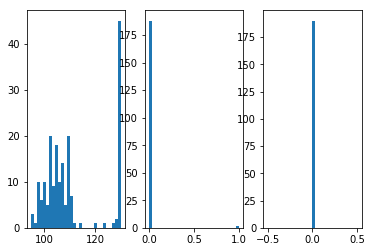

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.hist(np.sum(test_tensors[0]==0, axis=1), bins=30)
ax2.hist(np.sum(test_tensors[1]==0, axis=1), bins=30)
ax3.hist(np.sum(test_tensors[2]==0, axis=1), bins=30)

In [21]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.optimizers import RMSprop
# Building the model architecture with one layer of length 100
model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(90,90,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(len(bur_classes), activation='softmax'))
model.summary()
# Compile model
epochs = 50
learning_rate = 0.0001
decay_rate = learning_rate / epochs
momentum = 0.8
#sgd = SDG(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
#sgd = Adam(lr=learning_rate, decay=decay_rate)
sgd = RMSprop(lr=learning_rate, decay=decay_rate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 90, 90, 64)        4864      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 45, 45, 64)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 45, 45, 32)        51232     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 22, 22, 64)        8256      
__________

In [12]:
score = model.evaluate(train_tensors, train_targets, verbose=0)
print("accuracy: ", score[1])

('accuracy: ', 0.5140186910317323)


In [13]:
from keras.callbacks import ModelCheckpoint  



### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 10

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(validation_tensors, validation_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 428 samples, validate on 51 samples
Epoch 1/10
428/428 [==============================] - 25s 59ms/step - loss: 0.6076 - acc: 0.7103 - val_loss: 0.6958 - val_acc: 0.5098

Epoch 00001: val_loss improved from inf to 0.69576, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 2/10
428/428 [==============================] - 25s 58ms/step - loss: 0.4492 - acc: 0.8388 - val_loss: 0.6979 - val_acc: 0.4706

Epoch 00002: val_loss did not improve
Epoch 3/10
428/428 [==============================] - 22s 52ms/step - loss: 0.3288 - acc: 0.8621 - val_loss: 0.7067 - val_acc: 0.5490

Epoch 00003: val_loss did not improve
Epoch 4/10
428/428 [==============================] - 23s 53ms/step - loss: 0.2679 - acc: 0.8832 - val_loss: 0.7166 - val_acc: 0.5490

Epoch 00004: val_loss did not improve
Epoch 5/10
428/428 [==============================] - 24s 56ms/step - loss: 0.2201 - acc: 0.9159 - val_loss: 0.7399 - val_acc: 0.5490

Epoch 00005: val_loss did not improve
Epoch 6/10
428/4

In [18]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()
model.add(Conv2D(32, (2, 2), padding='same', activation='relu', input_shape=(90,90,3)))
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(len(bur_classes), activation='softmax'))
model.summary()

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# Compiling the model using categorical_crossentropy loss, and rmsprop optimizer.
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Compile model
from keras.optimizers import RMSprop
epochs = 10
learning_rate = 0.0001
decay_rate = learning_rate / epochs
momentum = 0.8
#optimizer = GD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
optimizer = RMSprop(lr=learning_rate, decay=decay_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 90, 90, 32)        416       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 89, 89, 32)        4128      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 44, 44, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 44, 44, 64)        8256      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 43, 43, 64)        16448     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 21, 21, 64)        0         
__________

In [19]:
from keras.callbacks import ModelCheckpoint  



### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 10

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(train_tensors)

# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(train_tensors, train_targets, batch_size=32),
                    validation_data=(validation_tensors, validation_targets),
                    steps_per_epoch=len(train_tensors) / 32, epochs=epochs, callbacks=[checkpointer], verbose=1)

#model.fit(train_tensors, train_targets, 
#          validation_data=(validation_tensors, validation_targets),
#          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Epoch 1/10
13/13 [==============================] - 171s 13s/step - loss: 0.6422 - acc: 0.5976 - val_loss: 0.6926 - val_acc: 0.6275

Epoch 00001: val_loss improved from inf to 0.69256, saving model to saved_models/weights.best.from_scratch.hdf5
Epoch 2/10
13/13 [==============================] - 157s 12s/step - loss: 0.5907 - acc: 0.6401 - val_loss: 0.6929 - val_acc: 0.5686

Epoch 00002: val_loss did not improve
Epoch 3/10
13/13 [==============================] - 143s 11s/step - loss: 0.5487 - acc: 0.7112 - val_loss: 0.6935 - val_acc: 0.5686

Epoch 00003: val_loss did not improve
Epoch 4/10
13/13 [==============================] - 150s 12s/step - loss: 0.4783 - acc: 0.7597 - val_loss: 0.6948 - val_acc: 0.5294

Epoch 00004: val_loss did not improve
Epoch 5/10
13/13 [==============================] - 159s 12s/step - loss: 0.4613 - acc: 0.7610 - val_loss: 0.6954 - val_acc: 0.5294

Epoch 00005: val_loss did not improve
Epoch 6/10
 3/13 [=====>........................] - ETA: 2:31 - loss: 0

KeyboardInterrupt: 

In [ ]:
score = model.evaluate(train_tensors, train_targets, verbose=0)
print("accuracy: ", score[1])